# Stock Value Prediction 

**importing necessary libraries**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**reading dataset**

*we need values from open colunn only*

In [43]:
dataset_train = pd.read_csv('train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


**feature scaling**

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

**here we need first 60 values and based on that values we will do next prediction**

In [45]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building RNN from scratch

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
regressor = Sequential()

# First layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Third layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Final layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0495
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 12/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0046
Epoch 13/100
38/38 [=====

38/38 [==============================] - 1s 14ms/step - loss: 0.0016: 0s - loss: 0.00


**testing model**

In [21]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

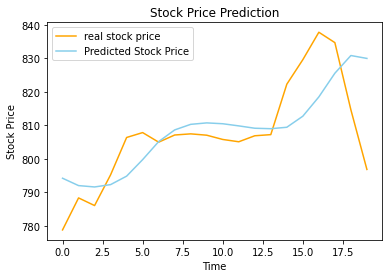

In [52]:
plt.plot(real_stock_price, color = 'orange', label = 'real stock price')
plt.plot(predicted_stock_price, color = 'skyblue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()